#### Set AWS-Access_Config incase if this notebook is not run in eks-jupyter environment

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

### 1. Import Libraries

In [2]:
import pandas as pd
import copy

In [3]:
from ts_forecast.core.utils.viz import (
    get_csv_from_s3, get_metrics_for_given_exp, get_metric_analysis_df, get_merged_df_from_list,
    get_final_run_level_merged_df, print_final_df_with_grad, compare_across_runs, get_final_item_level_merged_df,
    compare_across_ts_pie, compare_across_ts_bar, get_final_date_item_merged_df, 
    get_final_date_item_merged_melted_df, compare_actual_forecast_time_period, filter_print_ts_for_items,
    get_error_ts_df, get_run_details_with_exp_name, prepare_run_metrics_dict
)
from ts_forecast.core.containers import Core
from ts_forecast.scripts.cli import load_yaml

### 2. Set config

In [4]:
cred = load_yaml("./../configs/dev.yml")

In [5]:
Core.config.override(cred)
Core.logger()

<Logger ts_forecast.core.containers (DEBUG)>

#### Merge Runs

In [6]:
# Experiment-Name : [Dag_Id_1, Dag_Id_2]
exp_dag_list = {
    "test_deepAR" : ["dag_id_1", "dag_id_1"],
    "test_deepAR" : ["dag_id_1", "dag_id_1"],
}

### 3. Set Run-Params

#### 3.1. Print all runs of for the experiments

In [7]:
run_details_df = get_run_details_with_exp_name(exp_dag_list)
run_details_df

,exp_name,run_name,dag_id,last_train_date,model_date,prediction_length,avg_mad,avg_mean_dev,avg_wmape,model_uri,score_artifact_uri,metrics_uri,error_ts_uri,forecast_end_date
0,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-23 00:00:00,1752-06-24,14,3270.549143,3271.496446,1.165686,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-08
0,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-23 00:00:00,1752-06-24,14,3270.549143,3271.496446,1.165686,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-08
1,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-24 00:00:00,1752-06-25,14,3253.348379,3259.682066,1.160951,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-09
1,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-24 00:00:00,1752-06-25,14,3253.348379,3259.682066,1.160951,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-09
2,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-25 00:00:00,1752-06-26,14,3254.787330,3254.199716,1.159307,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-10
2,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-25 00:00:00,1752-06-26,14,3254.787330,3254.199716,1.159307,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-10
3,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-26 00:00:00,1752-06-27,14,3259.130780,3254.350309,1.158047,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-11
3,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-26 00:00:00,1752-06-27,14,3259.130780,3254.350309,1.158047,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-11
4,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-27 00:00:00,1752-06-28,14,3265.504263,3244.422330,1.155264,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-12
4,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-27 00:00:00,1752-06-28,14,3265.504263,3244.422330,1.155264,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-12


#### 3.2. Select experiments

##### Note: A single experiment_run should have only one `model_version` for a given `model_date`.
##### If you have multiple runs, include the version filter that has been commented out below

In [8]:
filter_df = run_details_df.loc[
    (run_details_df['model_date']=="1752-06-24")
    & (run_details_df['exp_name'].isin(["test_deepAR", "test_deepAR"]))
    & (run_details_df['dag_id'].isin([
        "dag_id_1", "dag_id_1", 
        "dag_id_1", "dag_id_1"
    ]))
]
filter_df

,exp_name,run_name,dag_id,last_train_date,model_date,prediction_length,avg_mad,avg_mean_dev,avg_wmape,model_uri,score_artifact_uri,metrics_uri,error_ts_uri,forecast_end_date
0,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-23 00:00:00,1752-06-24,14,3270.549143,3271.496446,1.165686,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-08
0,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-23 00:00:00,1752-06-24,14,3270.549143,3271.496446,1.165686,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-08


#### 3.4. Get final prepared df

In [9]:
final_df_list, final_melted_df = get_final_run_level_merged_df(filter_df)

### 4. Compare ACROSS-RUNS

In [10]:
print_final_df_with_grad(final_df_list)

,exp_name,run_name,dag_id,last_train_date,model_date,prediction_length,avg_mad,avg_mean_dev,avg_wmape,model_uri,score_artifact_uri,metrics_uri,error_ts_uri,forecast_end_date,exp_name_dag_id
0,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-23 00:00:00,1752-06-24 00:00:00,14,3270.549143,3271.496446,1.165686,s3://tiger-mle-shipping-forecasting/mlflow/mlflow-artifacts/3bf93f2017b94234b058acf94b4080b5/artifacts,s3://tiger-mle-shipping-forecasting/outputs/forecast-results/test_deepAR/EXE_17520624/num_transactions,s3://tiger-mle-shipping-forecasting/mlflow/mlflow-artifacts/3bf93f2017b94234b058acf94b4080b5/artifacts/metrics/item_level_metrics.csv,s3://tiger-mle-shipping-forecasting/mlflow/mlflow-artifacts/3bf93f2017b94234b058acf94b4080b5/artifacts/error/score_ts_error_list.csv,1752-07-08 00:00:00,"test_deepAR, dag_id_1"


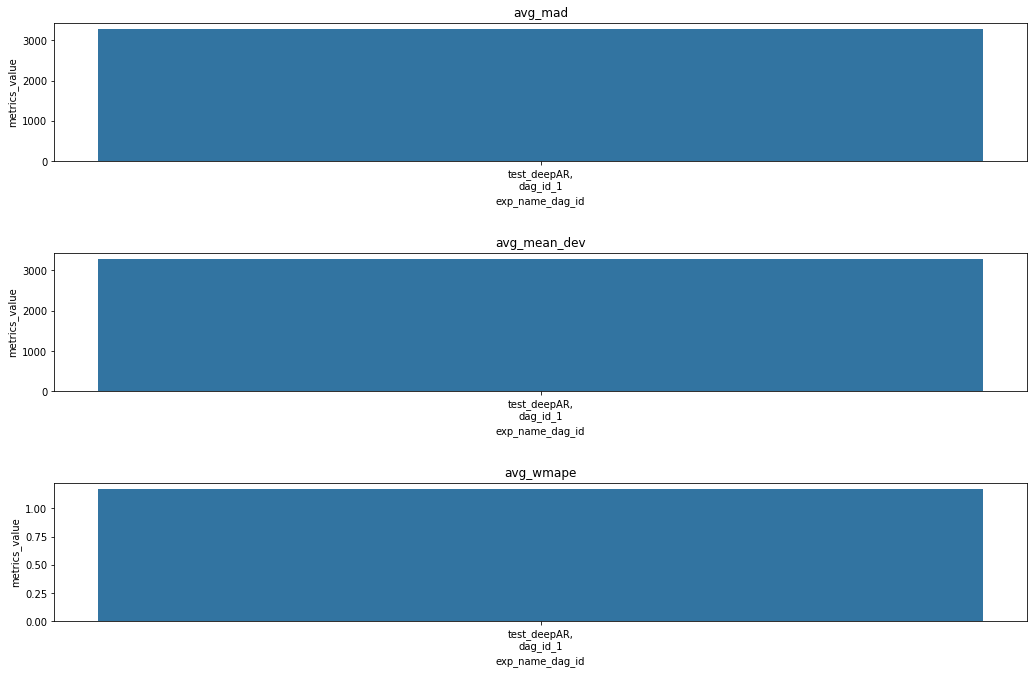

In [11]:
compare_across_runs(final_melted_df, figsize=(15, 10))

### 5. Compare item level metrics

In [12]:
final_df_list

,exp_name,run_name,dag_id,last_train_date,model_date,prediction_length,avg_mad,avg_mean_dev,avg_wmape,model_uri,score_artifact_uri,metrics_uri,error_ts_uri,forecast_end_date,exp_name_dag_id
0,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-23 00:00:00,1752-06-24,14,3270.549143,3271.496446,1.165686,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-08,"test_deepAR,\ndag_id_1"


In [13]:
exp_dag_list = {
    "test_deepAR" : "dag_id_1",
    "test_deepAR" : "dag_id_1"
}
item_level_metrics_df = get_final_item_level_merged_df(exp_dag_list, final_df_list)

2020-06-19 06:34:18 — ts_forecast.core.utils.viz — INFO — get_final_item_level_merged_df:220 — Reading: s3://tiger-mle-shipping-forecasting/mlflow/mlflow-artifacts/3bf93f2017b94234b058acf94b4080b5/artifacts/metrics/item_level_metrics.csv


#### 5.1. Run_1 and Run_2 comparison

#### `mad` analysis

,avg_mad
"(486.538, 2707.178]",0.461538
"(2707.178, 4918.971]",0.307692
"(7130.764, 9342.557]",0.153846
"(4918.971, 7130.764]",0.076923


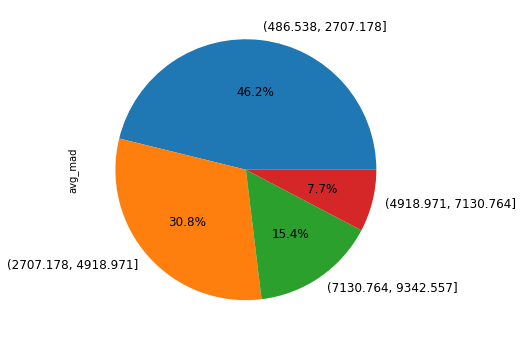

In [14]:
error_metric_name = "avg_mad"
compare_across_ts_pie(
    error_metric_name=error_metric_name, 
    item_level_metrics_df=item_level_metrics_df, 
    bins=4,
    figsize=(6, 6), 
    fontsize=12,
)

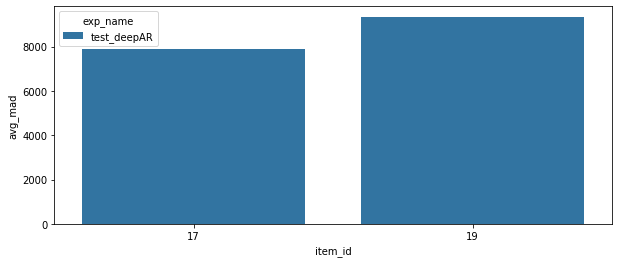

In [15]:
compare_across_ts_bar(
    error_metric_name=error_metric_name, 
    item_level_metrics_df=item_level_metrics_df, 
    figsize=(10, 4), 
    error_metric_threshold=7130
)

#### `avg_mean_dev` analysis

,avg_mean_dev
"(535.115, 2770.45]",0.538462
"(2770.45, 4996.879]",0.230769
"(7223.308, 9449.737]",0.153846
"(4996.879, 7223.308]",0.076923


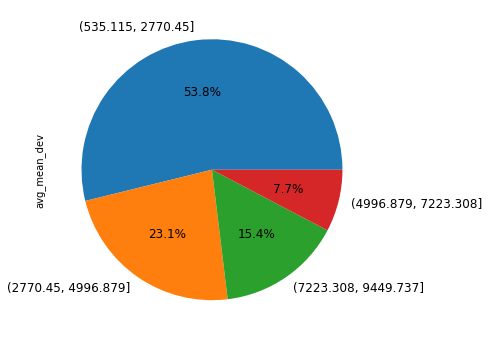

In [16]:
error_metric_name = "avg_mean_dev"
compare_across_ts_pie(
    error_metric_name=error_metric_name, 
    item_level_metrics_df=item_level_metrics_df, 
    bins=4,
    figsize=(6, 6), 
    fontsize=12,
)

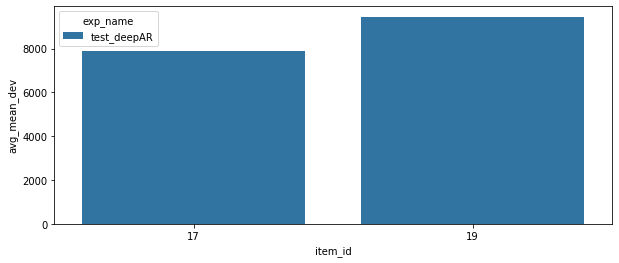

In [17]:
compare_across_ts_bar(
    error_metric_name=error_metric_name, 
    item_level_metrics_df=item_level_metrics_df, 
    figsize=(10, 4), 
    error_metric_threshold=7223
)

#### `wmape` analysis

,avg_wmape
"(0.179, 1.421]",0.769231
"(1.421, 2.657]",0.153846
"(3.893, 5.13]",0.076923
"(2.657, 3.893]",0.000000


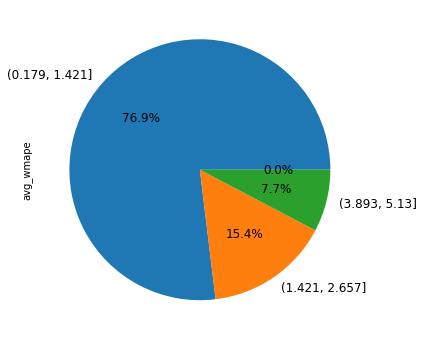

In [18]:
error_metric_name = "avg_wmape"
compare_across_ts_pie(
    error_metric_name=error_metric_name, 
    item_level_metrics_df=item_level_metrics_df, 
    bins=4,
    figsize=(6, 6), 
    fontsize=12,
)

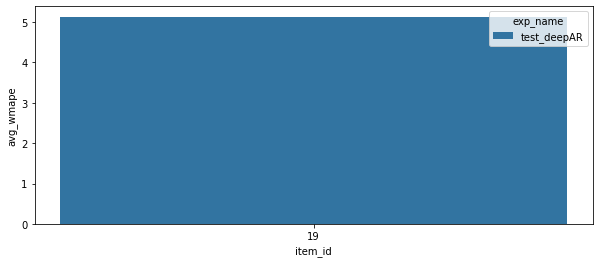

In [19]:
compare_across_ts_bar(
    error_metric_name=error_metric_name, 
    item_level_metrics_df=item_level_metrics_df, 
    figsize=(10, 4), 
    error_metric_threshold=3
)

### 6. Comparison at TS Store-Id level, [17, 19]

### Analyze Exp-Name:Dag-Id, `"test_deepAR" : "dag_id_1"`

In [20]:
final_df_list

,exp_name,run_name,dag_id,last_train_date,model_date,prediction_length,avg_mad,avg_mean_dev,avg_wmape,model_uri,score_artifact_uri,metrics_uri,error_ts_uri,forecast_end_date,exp_name_dag_id
0,test_deepAR,test_deepAR--num_transactions,dag_id_1,1752-06-23 00:00:00,1752-06-24,14,3270.549143,3271.496446,1.165686,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/outputs/fo...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,s3://tiger-mle-shipping-forecasting/mlflow/mlf...,1752-07-08,"test_deepAR,\ndag_id_1"


In [21]:
date_item_level_metrics_df = get_final_date_item_merged_df(
    exp_dag_list = {
        "test_deepAR" : "dag_id_1",
    }, 
    ts_ids=[17, 19], 
    final_df_list=final_df_list
)
date_item_level_metrics_df = date_item_level_metrics_df[["exp_name", "dag_id", "item_id", "busidaydt", "actual_values", "yhat"]]

In [22]:
date_item_level_metrics_melt_df = get_final_date_item_merged_melted_df(
    date_item_level_metrics_df=date_item_level_metrics_df
)

#### 6.1. Id, 17 analysis

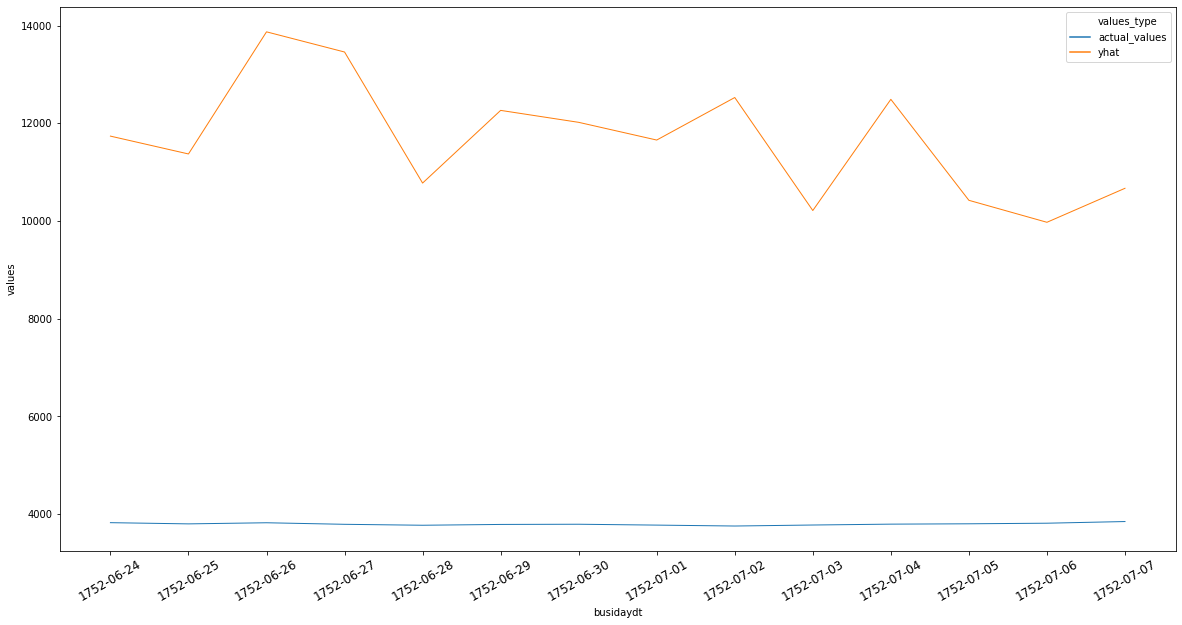

In [28]:
compare_actual_forecast_time_period(
    date_item_level_metrics_melt_df=date_item_level_metrics_melt_df, 
    item_id=17, 
    figsize=(20, 10),
    x_rotation=30
)

In [29]:
filter_print_ts_for_items(
    date_item_level_metrics_df=date_item_level_metrics_df, 
    item_id=17, 
    date_value="1752-06-12"
)

,exp_name,dag_id,item_id,busidaydt,actual_values,yhat
0,test_deepAR,dag_id_1,17,1752-06-24,3826.4,11739.083
1,test_deepAR,dag_id_1,17,1752-06-25,3801.7,11373.877
2,test_deepAR,dag_id_1,17,1752-06-26,3824.6,13873.721
3,test_deepAR,dag_id_1,17,1752-06-27,3792.8,13460.706
4,test_deepAR,dag_id_1,17,1752-06-28,3773.6,10778.076
5,test_deepAR,dag_id_1,17,1752-06-29,3790.2,12265.859
6,test_deepAR,dag_id_1,17,1752-06-30,3794.2,12021.264
7,test_deepAR,dag_id_1,17,1752-07-01,3776.5,11658.764
8,test_deepAR,dag_id_1,17,1752-07-02,3757.8,12529.131
9,test_deepAR,dag_id_1,17,1752-07-03,3778.4,10216.014


#### 6.2. Id, 19 analysis

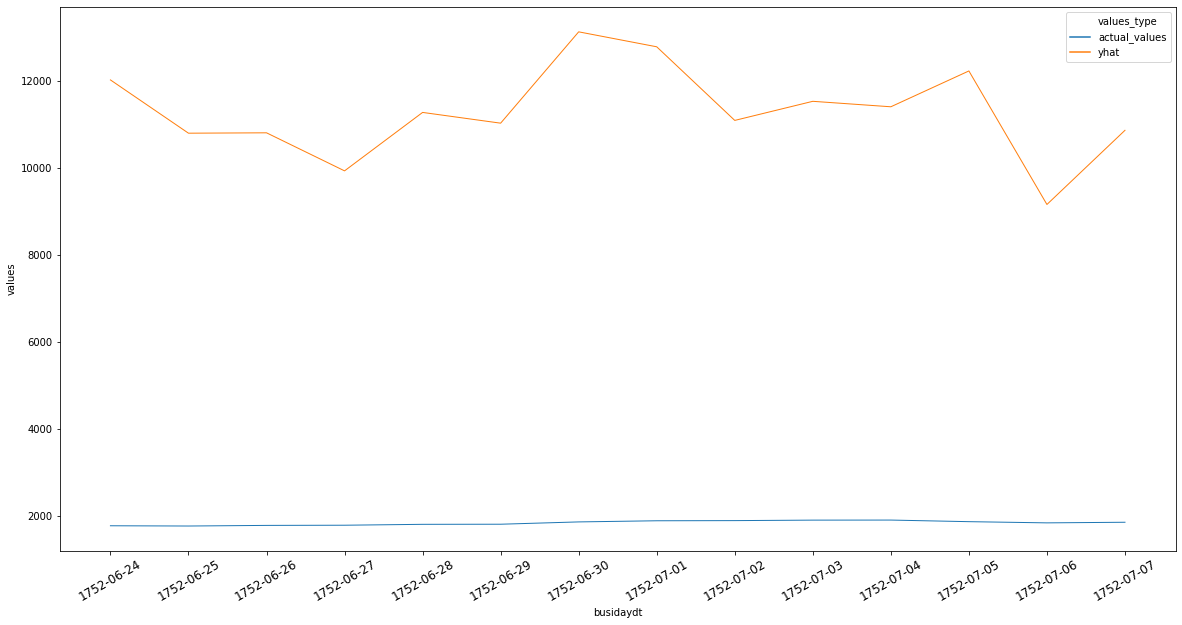

In [30]:
compare_actual_forecast_time_period(
    date_item_level_metrics_melt_df=date_item_level_metrics_melt_df, 
    item_id=19, 
    figsize=(20, 10),
    x_rotation=30
)

In [31]:
filter_print_ts_for_items(
    date_item_level_metrics_df=date_item_level_metrics_df, 
    item_id=19, 
    date_value="1752-06-12"
)

,exp_name,dag_id,item_id,busidaydt,actual_values,yhat
0,test_deepAR,dag_id_1,19,1752-06-24,1777.5,12024.891
1,test_deepAR,dag_id_1,19,1752-06-25,1771.5,10800.389
2,test_deepAR,dag_id_1,19,1752-06-26,1785.8,10809.029
3,test_deepAR,dag_id_1,19,1752-06-27,1789.8,9934.528
4,test_deepAR,dag_id_1,19,1752-06-28,1810.4,11277.678
5,test_deepAR,dag_id_1,19,1752-06-29,1812.8,11030.635
6,test_deepAR,dag_id_1,19,1752-06-30,1866.0,13129.846
7,test_deepAR,dag_id_1,19,1752-07-01,1892.3,12786.114
8,test_deepAR,dag_id_1,19,1752-07-02,1895.8,11094.160
9,test_deepAR,dag_id_1,19,1752-07-03,1906.9,11533.038


### 7. TS which are done scored. 
Reasons could be
- Test values are not available for the Forecast-Period
- Test values have "nan"s
- Sum(test values) == 0, for the entire Forecast-Period

In [32]:
bk_1_error_df = get_error_ts_df(
    exp_dag={"test_deepAR" : "dag_id_1"}, 
    final_df_list=final_df_list
)

### 7.1. TS_Error for "bk_full_a_1"

In [33]:
bk_1_error_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
Item_id,3,5,23,25,27,37,39,41,43,45,47,49


### Analyze Exp-Name:Dag-Id, `"test_deepAR" : "dag_id_1"`

In [35]:
date_item_level_metrics_df = get_final_date_item_merged_df(
    exp_dag_list = {
        "test_deepAR" : "dag_id_1",
    }, 
    ts_ids=[17, 19], 
    final_df_list=final_df_list
)
date_item_level_metrics_df = date_item_level_metrics_df[["exp_name", "dag_id", "item_id", "busidaydt", "actual_values", "yhat"]]

In [36]:
date_item_level_metrics_melt_df = get_final_date_item_merged_melted_df(
    date_item_level_metrics_df=date_item_level_metrics_df
)

#### 6.1. Id, 17 analysis

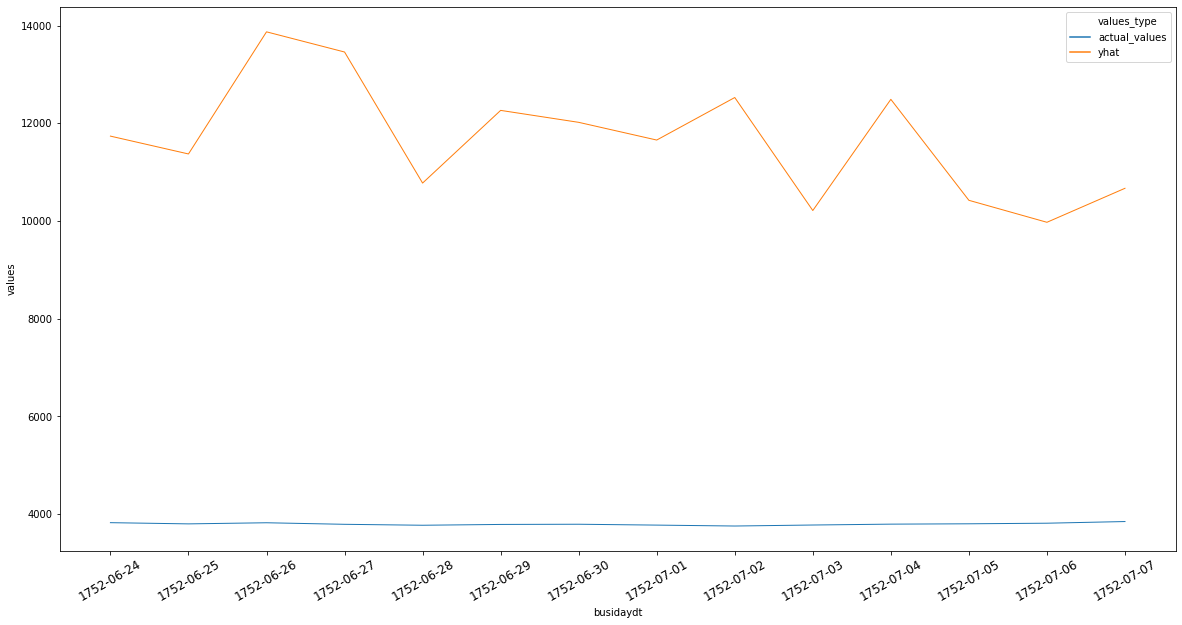

In [37]:
compare_actual_forecast_time_period(
    date_item_level_metrics_melt_df=date_item_level_metrics_melt_df, 
    item_id=17, 
    figsize=(20, 10),
    x_rotation=30
)

In [38]:
filter_print_ts_for_items(
    date_item_level_metrics_df=date_item_level_metrics_df, 
    item_id=17, 
    date_value="1752-06-12"
)

,exp_name,dag_id,item_id,busidaydt,actual_values,yhat
0,test_deepAR,dag_id_1,17,1752-06-24,3826.4,11739.083
1,test_deepAR,dag_id_1,17,1752-06-25,3801.7,11373.877
2,test_deepAR,dag_id_1,17,1752-06-26,3824.6,13873.721
3,test_deepAR,dag_id_1,17,1752-06-27,3792.8,13460.706
4,test_deepAR,dag_id_1,17,1752-06-28,3773.6,10778.076
5,test_deepAR,dag_id_1,17,1752-06-29,3790.2,12265.859
6,test_deepAR,dag_id_1,17,1752-06-30,3794.2,12021.264
7,test_deepAR,dag_id_1,17,1752-07-01,3776.5,11658.764
8,test_deepAR,dag_id_1,17,1752-07-02,3757.8,12529.131
9,test_deepAR,dag_id_1,17,1752-07-03,3778.4,10216.014


#### 6.2. Id, 19 analysis

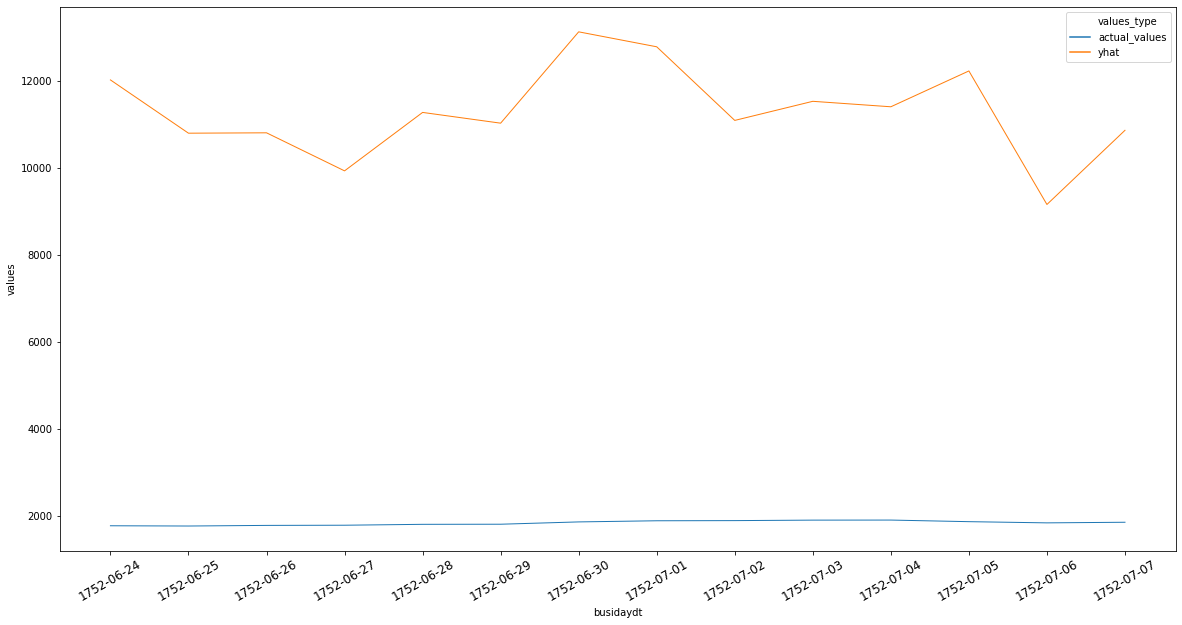

In [39]:
compare_actual_forecast_time_period(
    date_item_level_metrics_melt_df=date_item_level_metrics_melt_df, 
    item_id=19, 
    figsize=(20, 10),
    x_rotation=30
)

In [40]:
filter_print_ts_for_items(
    date_item_level_metrics_df=date_item_level_metrics_df, 
    item_id=19, 
    date_value="1752-06-12"
)

,exp_name,dag_id,item_id,busidaydt,actual_values,yhat
0,test_deepAR,dag_id_1,19,1752-06-24,1777.5,12024.891
1,test_deepAR,dag_id_1,19,1752-06-25,1771.5,10800.389
2,test_deepAR,dag_id_1,19,1752-06-26,1785.8,10809.029
3,test_deepAR,dag_id_1,19,1752-06-27,1789.8,9934.528
4,test_deepAR,dag_id_1,19,1752-06-28,1810.4,11277.678
5,test_deepAR,dag_id_1,19,1752-06-29,1812.8,11030.635
6,test_deepAR,dag_id_1,19,1752-06-30,1866.0,13129.846
7,test_deepAR,dag_id_1,19,1752-07-01,1892.3,12786.114
8,test_deepAR,dag_id_1,19,1752-07-02,1895.8,11094.160
9,test_deepAR,dag_id_1,19,1752-07-03,1906.9,11533.038


### 7. TS which are done scored. 
Reasons could be
- Test values are not available for the Forecast-Period
- Test values have "nan"s
- Sum(test values) == 0, for the entire Forecast-Period

In [41]:
bk_2_error_df = get_error_ts_df(
    exp_dag={"test_deepAR" : "dag_id_1"}, 
    final_df_list=final_df_list
)

### 7.1. TS_Error for "bk_full_a_2"

In [42]:
bk_2_error_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
Item_id,3,5,23,25,27,37,39,41,43,45,47,49
